# Exploring the accuracy of the truncated wavelet transform

In [1]:
import numpy as np

import jax

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as patches

import WDM

Time series properties.

In [2]:
dt, N, Nt, Nf = 0.5, 512, 64, 8

assert Nf*Nt==N, "Incompatible dimensions"

Generate a white noise time series signal with r.m.s. value of 1.

In [3]:
key = jax.random.key(0)
key, subkey = jax.random.split(key)
x = jax.random.normal(subkey, shape=(N,)) # white noise

Perform a bunch of different wavelet transforms with different truncation $q$ parameters.
We quantify the accuracy of the transformation by performing a forward (truncated) and inverse (exact) wavelet transformation and looking at the largest absolute difference between the original and recovered time series.

Allowed values of $q$. Must be an integer in the range $1\leq q \leq N_t/2\equiv 32$.

In [4]:
q_vals = [1,2,4,8,10,12,14,16,20,25,32]

err_vals = np.zeros(len(q_vals))

for i, q in enumerate(q_vals): 
    wdm = WDM.code.discrete_wavelet_transform.WDM.WDM_transform(dt=0.5, 
                                                                Nf=Nf,
                                                                N=N, 
                                                                q=q,
                                                                calc_m0=True)
    
    w = wdm.forward_transform_truncated(x)

    x_recovered = wdm.inverse_transform(w)

    err_vals[i] = np.max(np.abs(x - x_recovered))

We will also compare this with the error when using the exact forward transform. The exact transform should be same as the truncated transform when $q=N_t/2=32$.

In [5]:
wdm = WDM.code.discrete_wavelet_transform.WDM.WDM_transform(dt=0.5, 
                                                            Nf=Nf,
                                                            N=N, 
                                                            calc_m0=True)

w = wdm.forward_transform_exact(x)

x_recovered = wdm.inverse_transform(w)

err = np.max(np.abs(x - x_recovered))

Plot the errors in the truncated wavelet transform as a function of the truncation parameter.

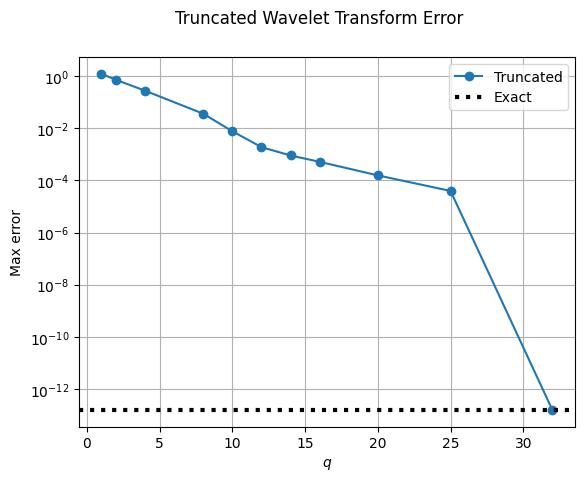

In [6]:
fig, ax = plt.subplots()
fig.suptitle("Truncated Wavelet Transform Error")

ax.plot(q_vals, err_vals, marker='o', label='Truncated')
ax.axhline(err, color='k', lw=3, linestyle=':', label='Exact')

ax.set_xlabel(r"$q$")
ax.set_ylabel(r"Max error")

ax.set_yscale('log')

ax.grid()
ax.legend(loc='upper right')

plt.show()

The accuracy of the truncated wavelet transformation also depends on the value of $d$.
Wavelets with smaller d are slightly better localised in time leading to a slightly more accurate truncated transformations for small $q$.

In [7]:
d_vals = [1, 4, 16]

q_vals = [1,2,4,8,10,12,14,16,20,25,32]

err_vals = {}

for j, d in enumerate(d_vals):

    err_vals[d] = np.zeros(len(q_vals))

    for i, q in enumerate(q_vals): 
        wdm = WDM.code.discrete_wavelet_transform.WDM.WDM_transform(dt=0.5, 
                                                                    Nf=Nf,
                                                                    N=N, 
                                                                    q=q,
                                                                    d=d,
                                                                    calc_m0=True)
        
        w = wdm.forward_transform_truncated(x)

        x_recovered = wdm.inverse_transform(w)

        err_vals[d][i] = np.max(np.abs(x - x_recovered))

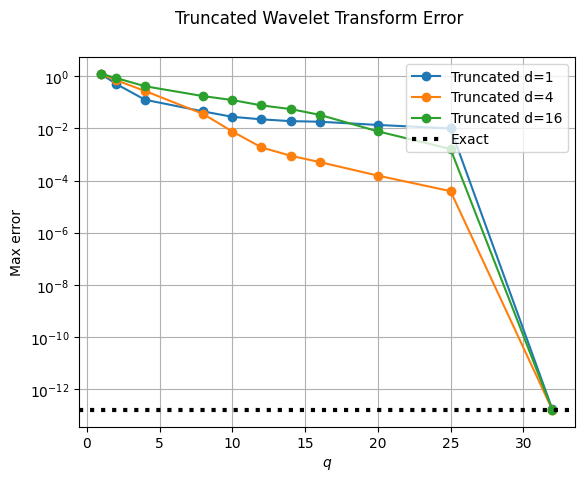

In [8]:
fig, ax = plt.subplots()
fig.suptitle("Truncated Wavelet Transform Error")

for d in d_vals:
    ax.plot(q_vals, err_vals[d], marker='o', label=f'Truncated {d=}')
ax.axhline(err, color='k', lw=3, linestyle=':', label='Exact')

ax.set_xlabel(r"$q$")
ax.set_ylabel(r"Max error")

ax.set_yscale('log')

ax.grid()
ax.legend(loc='upper right')

plt.show()